# CE613 Assignment 3
GOPAL RAI (Roll no-21103040)
## Topics - Sympy, Scipy libraries introduction

### Q1. Scipy Tutorial
Kindly refer chapter __7.4__ of the Python textbook.

### Q2. Sympy Tutorial
Kindly refer chapter __8__ of the Python textbook.


*[Evaluation on Q1 & Q2 will be carried out by viva] *  

### Q3. Bisection Method Problem - 
Write a program for bisection method and use it to solve the following code.

$ f(x) = x^4 - 5x^3 - 12 x^2 +76 x -79 = 0 $

Plot the above function and mark the location of roots <br>
Solve the above equation by using inbuilt bisection function. 

In [ ]:
def func(x):
	return (x**4)-(5*x**3)-(12*x**2)+(76*x)-79


def bisection(a,b):

	if (func(a) * func(b) >= 0):
		print("You have not assumed right a and b")
		return

	c = a
	while ((b-a) >= 0.0001):	
		c = (a+b)/2
		if (func(c) == 0.0):
			break		
		elif (func(c)*func(a) < 0):
			b = c
		else:
			a = c
			
	print("The value of root is : ",c)
print("Enter two initial values to start iteration:")	
a =float(input("Enter the first value: "))
b = float(input("Enter the second value: "))
bisection(a, b)


Enter two initial values to start iteration:
Enter the first value: 0
Enter the second value: 5
The value of root is :  4.9875640869140625


The roots of f(x) are: -3.9969093367380992 1.7683868949116004 2.2409886336627096 4.987533808167427


Text(0.5, 1.0, 'function and the location of the roots')

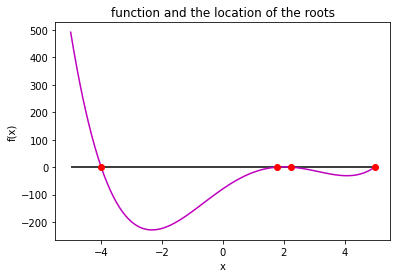

In [ ]:
#using inbuilt bisection function
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
root1 = optimize.bisect(func,-2,-6) 
root2 = optimize.bisect(func,-2,2)
root3 = optimize.bisect(func,4,2)
root4 = optimize.bisect(func,4,6)
print("The roots of f(x) are:", root1,root2,root3,root4)

x_values = np.arange(-5,5,.1)
plt.plot(x_values, func(x_values),'m')
plt.hlines(0, -5,5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(root1,0,'ro',root2,0,'ro',root3,0,'ro',root4,0,'ro')
plt.title('function and the location of the roots')

### Q4. Finding roots of polynomial using numerical method (Newton-Raphson), scipy and sympy
Define the following function symbolically<br> 
$f(x) = (x^{2} - 4x)(x^{2} - 4x + 1) - 20$

(a) Expand $f(x)$ using expand.<br> 
(b) Show that $(x^{2} - 4x + 4)$ is a factor of $f$ by dividing $f$ with this factor.<br> 
(c) Factorize $f$ using the symbolic function factorize and verify the factor you used in (b).<br> 
(d) Find the roots of one of the two factors. (Hint: Take one of the factors as an expression and use solve to find two roots).
<br> (e) Solve (d) using *Newton Raphson method* and in-built functions from *scipy* <br>
(f) Substitute one of the roots for $x$, say $x = x1$, in $f$ and simplify the expression to show that $j(x1) = 0$.<br> 

In [ ]:
from sympy import *
init_printing(use_latex=true)
x = Symbol('x')
def f(x):
  return ((x**2-4*x)*(x**2-4*x+1))-20
print("The given f(x) in symbolic form is: ")
display(f(x))

The given f(x) in symbolic form is: 


In [ ]:
#a)
f_expand=expand(f(x))
f_expand

In [ ]:
#b)
import sympy as sym
def g(x):
  return x**2-4*x+4
quotient,remainder = sym.div(f(x),g(x))
print("The quotient is:")
display(quotient)
if remainder==0:
  print("The given fuction g(x) is a factor")
else:
  print("The given fuction g(x) is NOT a factor")
  print("Obtained remainder is", remainder)


The quotient is:


The given fuction g(x) is NOT a factor
Obtained remainder is -8


In [ ]:
#c)
factors = factor_list(f(x))
print("The factors are:")
display(factors)


The factors are:


In [ ]:
#d)
fact_1 = (factors[1][0][0])**factors[1][0][1]
print("One of the factor is:")
display(fact_1) 
roots = solve(fact_1)
print("Whose roots are:")
display(roots)

One of the factor is:


Whose roots are:


In [ ]:
#e)
def func_1( x ):
	return x**2 - 4*x - 4
def derivFunc( x ):
	return 2*x-4

def newtonRaphson( x ):
	h = func_1(x) / derivFunc(x)
	while abs(h) >= 0.0001:
		h = func_1(x)/derivFunc(x)
		
		# x(i+1) = x(i) - f(x) / f'(x)
		x = x - h
	
	print("The value of the root is : ", x)

# Driver program to test above
x0 = float(input("Please enter an initial guess:"))
newtonRaphson(x0)



Please enter an initial guess:0
The value of the root is :  -0.8284271247493797


In [ ]:

import scipy
guess = float(input("Enter the initial guess: "))
root = scipy.optimize.newton(func_1,guess)
print("The value of the root is :",root)

Enter the initial guess: 0
The value of the root is : -0.8284271247461897


In [ ]:
#f)
def f1(x):
  return ((x**2-4*x)*(x**2-4*x+1))-20
print("On putting the root of one of the factors in the funtion, result is:",round(f1(root)))

On putting the root of one of the factors in the funtion, result is: 0


### Q5. Integration by numerical method (Simpson rule and trapezoidal rule), scipy and sympy

(a) $\int_0^\infty e^{-x}\,\text{d}x $

(b) $\int_0^\infty e^{-x^2}\,\text{d}x $

(c) $\int_0^\infty e^{-x^2} sin(x) \,\text{d}x $

In [45]:
import numpy as np

def integrand_a(x):
  return np.exp(-x)
def integrand_b(x):
  return np.exp(-x**2)
def integrand_c(x):
  return np.exp(-x**2)*np.sin(x)

In [46]:
#inbuilt_simpson rule_scipy
import scipy.integrate as spi
x = np.arange(0, 1000)
y_a = integrand_a(x)
y_b = integrand_b(x)
y_c = integrand_c(x)
result_a = spi.simps(y_a,x) 
result_b = spi.simps(y_b,x)
result_c = spi.simps(y_c,x)
print("The result for integral a) is:", result_a)
print("The result for integral b) is:", result_b)
print("The result for integral c) is:", result_c)

The result for integral a) is: 1.0292999936336131
The result for integral b) is: 0.833641889177613
The result for integral c) is: 0.3520282256820613


In [47]:
#inbuilt_trapezoidal rule_scipy
result_a = spi.trapz(y_a,x)
result_b = spi.trapz(y_b,x)
result_c = spi.trapz(y_c,x)
print("The result for integral a) is:", result_a)
print("The result for integral b) is:", result_b)
print("The result for integral c) is:", result_c)

The result for integral a) is: 1.0819767068693265
The result for integral b) is: 0.886318602413326
The result for integral c) is: 0.3262315693776354


In [48]:
#Trapezoidal_by_function
def trapezoidal(integrand,lower,upper,interval):
  width = (upper-lower)/interval
  k = (integrand(upper) + integrand(lower))/2
  for i in range(1,interval):
    k = k + integrand(lower + i*width)
  return width*k

lower = int(input("Enter lower limit: "))
upper = int(input("Enter upper limit: "))
interval = int(input("Enter number of intervals: "))

result_a = trapezoidal(integrand_a,lower,upper,interval)
result_b = trapezoidal(integrand_b,lower,upper,interval)
result_c = trapezoidal(integrand_c,lower,upper,interval)
print("The result for integral a) is:", result_a)
print("The result for integral b) is:", result_b)
print("The result for integral c) is:", result_c)

Enter lower limit: 0
Enter upper limit: 100
Enter number of intervals: 100
The result for integral a) is: 1.0819767068693267
The result for integral b) is: 0.886318602413326
The result for integral c) is: 0.32623156937763537


In [49]:
def simpson(integrand,lower,upper,interval):
    width = (upper - lower)/interval
    xI0 = (integrand(upper) + integrand(lower))
    xI1 =0
    xI2=0
    for i in range(1,interval):
        x = lower + i*width
        if i%2 == 0: #even
            xI2 = xI2 + integrand(x)
        else:
            xI1 = xI1 + integrand(x)
    xI = width*(xI0 + 2*xI2 + 4*xI1)/3
    return xI


lower = int(input("Enter lower limit: "))
upper = int(input("Enter upper limit: "))
interval = int(input("Enter number of intervals: "))

r_a = simpson(integrand_a,lower,upper,interval)
r_b = simpson(integrand_b,lower,upper,interval)
r_c = simpson(integrand_c,lower,upper,interval)
print("The result for integral a) is:", r_a)
print("The result for integral b) is:", r_b)
print("The result for integral c) is:", r_c)

Enter lower limit: 0
Enter upper limit: 100
Enter number of intervals: 100
The result for integral a) is: 1.004957180659325
The result for integral b) is: 0.8362143022684955
The result for integral c) is: 0.42387257373998494


The result for integral a) is:


The result for integral b) is:


The result for integral c) is:


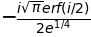

In [50]:
1#using sympy
from sympy import *
init_printing(use_latex=true)
x = var('x')
k=var('k')

integrand_a = exp(-x)
integrand_b = exp(-x**2)
integrand_c = exp(-x**2)*sin(k*x)


result_a = integrate(integrand_a,(x,0,oo))
result_b = integrate(integrand_b,(x,0,oo))
result_c = integrate(integrand_c,(x,0,oo))
result_c = result_c.subs(k,1)
print("The result for integral a) is:")
display(result_a)
print("The result for integral b) is:")
display (result_b)
print("The result for integral c) is:")
display(result_c)

### Q6. Solving differential equation using scipy and sympy

(a) $\frac {dx}{dt} + x^2 = 0,  x(0) =x_0$

(b)$\frac {d^2y}{dt^2} + w^2y = 0,  y(0) =y_0, \frac {dy}{dt}(0) = v_0$

The 1st differential equation is:


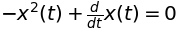

Its solution is:


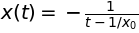

The 2nd differential equation is:


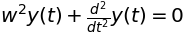

Its solution is:


In [ ]:
#Using Sympy
from sympy import *
init_printing(use_latex=true)

t = Symbol("t")
x = Function("x")
x_0 = Symbol("x_0")

ode_a = Eq(x(t).diff(t)-x(t)**2,0)
print("The 1st differential equation is:")
display(ode_a)
print("Its solution is:")
display(dsolve(ode_a,x(t),ics={x(0):x_0}))



y = Function("y")
w = Symbol("w")
y_0 = Symbol("y_0")
v_0 = Symbol("v_0")

ode_b = Eq(y(t).diff(t,t)+(w**2)*y(t),0)
print("The 2nd differential equation is:")
display(ode_b)
print("Its solution is:")
display(dsolve(ode_b,y(t),ics={y(0):y_0,y(t).diff(t).subs(t, 0): v_0}))


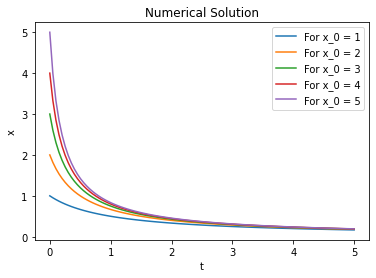

In [ ]:
#Using scipy
import numpy as np
import matplotlib.pyplot as plt

from scipy import integrate

def dxdt(x,t):
  return -x**2
t = np.linspace(0,5,100)
x0 = [1,2,3,4,5]
solution_a = integrate.odeint(dxdt,x0,t)
plt.plot(t,solution_a)
plt.xlabel("t")
plt.ylabel("x")
plt.title("Numerical Solution")
plt.legend(["For x_0 = 1","For x_0 = 2","For x_0 = 3","For x_0 = 4","For x_0 = 5"],loc ="best")

### Q7. Time series data plotting and statistics exercise

Using the daily weather data of Kanpur provided in excel sheet, do the following.

(a) plot daily, monthly and seasonal timeseries for all the variables.<br>
(b) estimate basic statistical properties (mean, median, standard deviation, skeweness and kurtosis) for all the variables at daily and monthly time steps. <br>
Hint: You may have to fill the missing values using an appropriate method<br>
Please save the plots in publication quality plots in suitable file format. You can visit the 'Guide for authors' section for finding the suitable format and resolution etc. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data= pd.read_csv('/content/drive/MyDrive/ce613a_lab/WeatherData_Kanpur.csv',index_col=0, parse_dates=True,encoding = 'unicode_escape')
data

,MaxTemp (°C),MinTemp (°C),Rainfall (mm),Humidity at 8:30 AM (%),Humidity at 5:30 PM (%),WindSpeed (m/s),WindDirection (° azimuth)
Date,,,,,,,
2018-01-01,15.90,9.62,0.0,99.82,95.41,0.76,NaN
2018-01-02,16.35,7.43,0.0,97.89,87.56,0.82,NaN
2018-01-03,15.18,6.45,0.0,99.94,91.21,0.59,NaN
2018-01-04,15.33,4.83,0.0,99.18,86.52,0.79,NaN
2018-01-05,13.70,4.35,0.0,99.44,91.81,1.00,NaN
...,...,...,...,...,...,...,...
2019-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Day'] = data.index.day


In [ ]:

dataf1 = data.drop(columns = ['WindDirection (° azimuth)'],errors='ignore')
dataf2 = dataf1.interpolate(method ='linear', limit_direction ='forward')
dataf2.loc['2018-12'].tail(10)

,MaxTemp (°C),MinTemp (°C),Rainfall (mm),Humidity at 8:30 AM (%),Humidity at 5:30 PM (%),WindSpeed (m/s),Year,Month,Day
Date,,,,,,,,,
2018-12-22,22.5300,5.0000,0.0,91.43,58.7200,1.37,2018,12,22
2018-12-23,22.6800,4.7000,0.0,94.21,62.9100,1.04,2018,12,23
2018-12-24,21.3500,5.1700,0.0,98.06,58.6600,1.40,2018,12,24
2018-12-25,19.4600,5.3300,0.0,91.56,54.1300,1.88,2018,12,25
2018-12-26,19.5675,5.0275,0.0,93.11,55.0525,1.41,2018,12,26
2018-12-27,19.6750,4.7250,0.0,94.66,55.9750,0.94,2018,12,27
2018-12-28,19.7825,4.4225,0.0,96.21,56.8975,0.47,2018,12,28
2018-12-29,19.8900,4.1200,0.0,97.76,57.8200,0.00,2018,12,29
2018-12-30,21.3400,6.3200,0.0,99.31,58.1400,0.00,2018,12,30


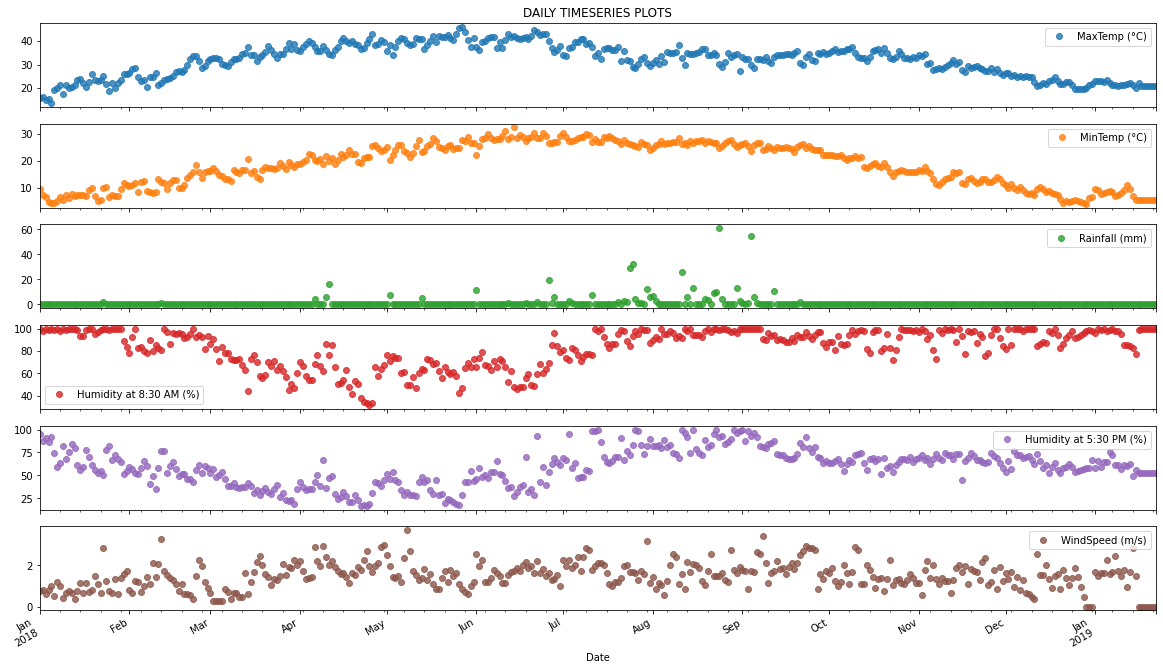

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_plot = ['MaxTemp (°C)',
 'MinTemp (°C)',
 'Rainfall (mm)',
 'Humidity at 8:30 AM (%)',
 'Humidity at 5:30 PM (%)',
 'WindSpeed (m/s)']
Daily = dataf2[columns_plot].plot(marker='o', alpha=0.8, linestyle='None', figsize=(20, 12), subplots=True)
Daily[0].set_title('DAILY TIMESERIES PLOTS')

from google.colab import files
plt.savefig("Daily_timeseries.png")


In [ ]:
#monthly
data1=data.groupby(['Year','Month'])['MaxTemp (°C)',
 'MinTemp (°C)',
 'Rainfall (mm)',
 'Humidity at 8:30 AM (%)',
 'Humidity at 5:30 PM (%)',
 'WindSpeed (m/s)'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


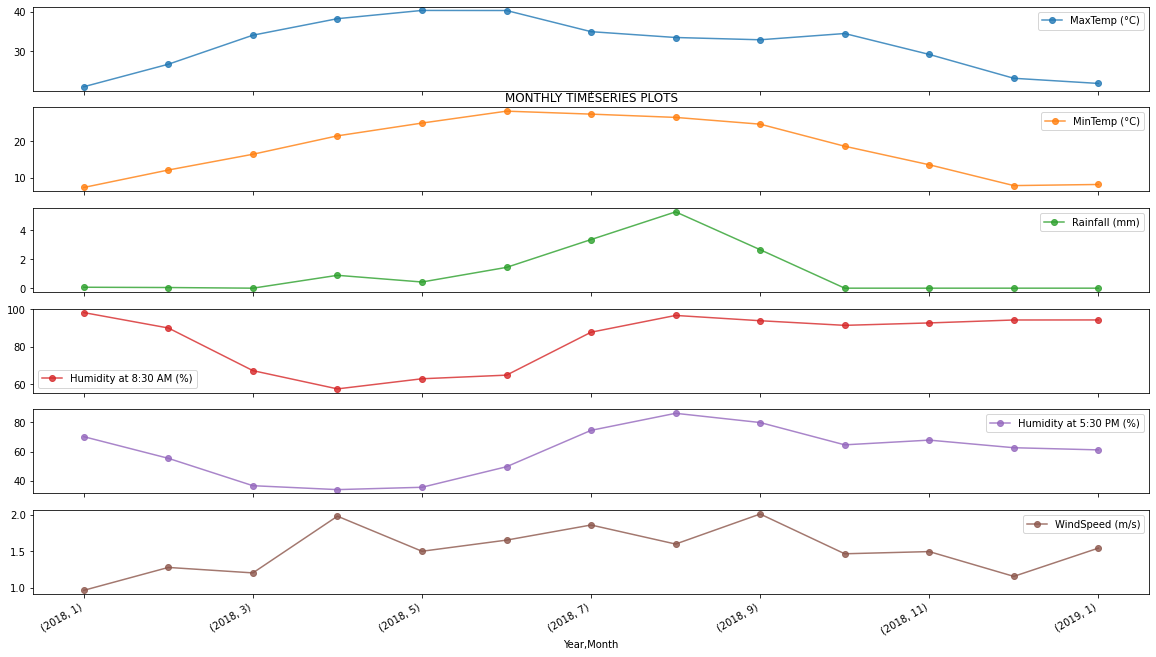

In [ ]:
Monthly = data1[columns_plot].plot(marker='o', alpha=0.8, linestyle='-', figsize=(20, 12), subplots=True)
Monthly[1].set(title ='MONTHLY TIMESERIES PLOTS')

from google.colab import files
plt.savefig("Monthly_timeseries.png")


In [ ]:
#daily timestep
dataf2.groupby('Year').agg(["min", "max", "median", "skew","std"])

MaxTemp (°C)                           ... Day                           
              min    max  median      skew  ... max median      skew       std
Year                                        ...                               
2018        13.70  46.03  33.540 -0.466362  ...  31   16.0  0.007552  8.808321
2019        20.05  23.43  21.345  0.431076  ...  22   11.5  0.000000  6.493587

[2 rows x 40 columns]

In [ ]:
dataf2.kurtosis() #kurtosis is not shown in groupby

MaxTemp (°C)               -0.776700
MinTemp (°C)               -1.317319
Rainfall (mm)              73.921377
Humidity at 8:30 AM (%)     0.010547
Humidity at 5:30 PM (%)    -0.475960
WindSpeed (m/s)             0.228141
Year                       12.831834
Month                      -1.262113
Day                        -1.169914
dtype: float64

In [ ]:
#monthly timestep
dataf2.loc['2018'].groupby('Month').agg(["min", "max", "median", "skew","std"])

MaxTemp (°C)                           ... Day                      
               min    max  median      skew  ... max median skew       std
Month                                        ...                          
1            13.70  26.20  21.480 -0.505655  ...  31   16.0  0.0  9.092121
2            20.36  33.78  26.600  0.333153  ...  28   14.5  0.0  8.225975
3            29.57  39.29  34.130  0.259136  ...  31   16.0  0.0  9.092121
4            34.25  42.78  38.420 -0.057645  ...  30   15.5  0.0  8.803408
5            33.93  46.03  40.620 -0.165019  ...  31   16.0  0.0  9.092121
6            35.12  44.68  40.955 -0.478654  ...  30   15.5  0.0  8.803408
7            28.41  40.74  35.810 -0.174986  ...  31   16.0  0.0  9.092121
8            27.42  38.10  34.150 -0.616362  ...  31   16.0  0.0  9.092121
9            28.33  35.67  33.165 -0.677756  ...  30   15.5  0.0  8.803408
10           31.70  37.44  34.700  0.016551  ...  31   16.0  0.0  9.092121
11           25.75  34.66  28.640  0.981999  ...  30   15.5  0.0  8.803408
12           19.46  26.37  22.540  0.008270  ...  31   16.0  0.0  9.092121

[12 rows x 40 columns]

In [ ]:
dataf2.loc['2018'].kurtosis() #kurtosis is not shown in groupby

MaxTemp (°C)               -0.444992
MinTemp (°C)               -1.169691
Rainfall (mm)              69.611620
Humidity at 8:30 AM (%)    -0.123017
Humidity at 5:30 PM (%)    -0.589848
WindSpeed (m/s)             0.192642
Year                        0.000000
Month                      -1.207131
Day                        -1.193042
dtype: float64

#Q8. 

Consider the following properties of a trapezoidal channel:

Bed width - 20 m
Longitudinal slope - 0.001
Slide slope - 2H:1V
Flow depth - 2 m
Discharge - 60 m3/s
Manning's roughness - 0.012
Length of the channel - 500 m

(a) Create a dictionary to store the above data

(b) Use dictionary comprehension to convert the 'values' in the dictionary from SI to FPS system

(c) Write a lambda function to arrange 'keys' of the dictionary in an alphabetical order.

(d) Draw the longitudinal profile of the channel and show normal depth line and critical depth line in it.

(e) Draw the channel cross-section and show normal and critical flow depth in it.

Write functions wherever required. 

Also, make necessary assumptions and clearly state them.


In [ ]:
#a)
channel_si = {
    "Bed width": 20,
    "Longitutdnal slope": .001,
    "Side slope": .5,
    "Flow depth": 2,
    "Discharge": 60, 
    "Manning's roughness": 0.012,
    "Length of the channel": 500

}
print(channel_si)

{'Bed width': 20, 'Longitutdnal slope': 0.001, 'Side slope': 0.5, 'Flow depth': 2, 'Discharge': 60, "Manning's roughness": 0.012, 'Length of the channel': 500}


In [ ]:
#b)
channel_fps = channel_si
channel_fps['Bed width'] = channel_si['Bed width']*3.281
channel_fps['Discharge'] = channel_si['Discharge']*3.281*3
channel_fps['Flow depth'] = channel_si['Flow depth']*3.281
channel_fps['Length of the channel']= channel_si['Length of the channel']*3.281
print(channel_fps)

{'Bed width': 65.62, 'Longitutdnal slope': 0.001, 'Side slope': 0.5, 'Flow depth': 6.562, 'Discharge': 590.58, "Manning's roughness": 0.012, 'Length of the channel': 1640.5}


In [ ]:
#c)
channel_si_sort = dict(sorted(channel_si.items(), key= lambda i:i[0]))
channel_si_sort

{'Bed width': 65.62,
 'Discharge': 590.58,
 'Flow depth': 6.562,
 'Length of the channel': 1640.5,
 'Longitutdnal slope': 0.001,
 "Manning's roughness": 0.012,
 'Side slope': 0.5}

In [ ]:
#d)
from sympy import *
#for normal depth
y = Symbol("y")
mannings_eq = Eq(2.6352*(((20+2*y)*y)**(5/3))/((20+4.4721*y)**(2/3))-60,0)#after substituting the given values
temp_sol = solve(mannings_eq)
y_normal = [x for x in temp_sol if x.is_real][0] 
print("The normal depth is:",y_normal)
#for critical depth
Q,b,g = 60,20,9.81
q=Q/b
y_critical = ((q**2)/g)**(1/3)
print("The critical depth is:",y_critical)

The normal depth is: 1.06401740174985
The critical depth is: 0.9716827674320039


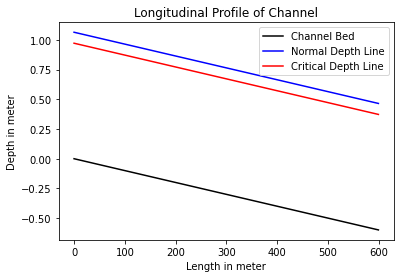

In [ ]:
#plotting
import matplotlib.pyplot as plt
import numpy as np


x=np.arange(0,600)


b_slope=-0.001*x
plt.plot(x,b_slope,'black', label='Channel Bed')
ndl=y_normal-0.001*x
plt.plot(x,ndl,'blue', label = 'Normal Depth Line')
cdl=y_critical-0.001*x
plt.plot(x,cdl,'red', label = 'Critical Depth Line')
plt.title("Longitudinal Profile of Channel")

plt.xlabel("Length in meter")
plt.ylabel("Depth in meter")
plt.plot()
plt.legend()


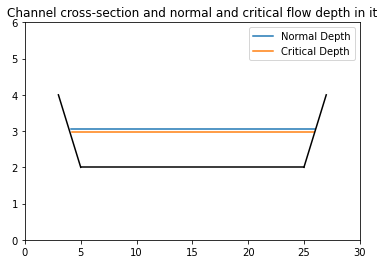

In [ ]:
#e)
import numpy as np
import matplotlib.pyplot as plt
ax =plt.gca()
X1=[5,25]
Y1=[2,2]
X2=[3,5]
Y2=[4,2]
X3=[25,27]
Y3=[2,4]
X = [4.13, 25.98]
Y = [3.064017, 3.064017]
X4=[4.25,25.9]
Y4=[2.9716827,2.9716827]
plt.plot(X,Y)
plt.plot(X4,Y4)
plt.plot(X1,Y1,'k')
plt.plot(X2,Y2,'k')
plt.plot(X3,Y3,'k')
ax.set_xlim(0,30)
ax.set_ylim(0,6)
plt.title('Channel cross-section and normal and critical flow depth in it')
plt.legend(['Normal Depth','Critical Depth'])
plt.show()